<a href="https://colab.research.google.com/github/dinilsonpedroza/API-SIDRAR/blob/master/A%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np ### baixando pacotes necessários a este trabalho.
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
! pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

Encontrar a correlação entre as ações **ITSA3** e **SPXI11** e entre as ações **ITSA4** com **IVVB11**.

Pegando as séries:

In [ ]:
ITSA3 = web.get_data_yahoo('ITSA3.SA', start="2015-01-30") ### Datas escolhidas conforme  disponibilidade da SPXI11.

[*********************100%***********************]  1 of 1 completed


In [ ]:
ITSA3.tail() ### Ações ordinárias da holding Itaú SA.

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-07,10.55,10.58,10.43,10.44,10.44,108200.0
2022-04-08,10.44,10.54,10.43,10.50,10.50,90900.0
2022-04-11,10.50,10.50,10.35,10.40,10.40,44900.0
2022-04-12,10.43,10.45,10.23,10.38,10.38,147000.0
2022-04-13,10.38,10.38,10.23,10.25,10.25,59100.0


In [ ]:
SPXI11 = web.get_data_yahoo('SPXI11.SA')

[*********************100%***********************]  1 of 1 completed


In [ ]:
SPXI11.tail() ### ETF (Exchange-traded Fund = fundo índice) do Itaú.

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-07,224.710007,228.089996,224.710007,227.250000,227.250000,31326
2022-04-08,227.250000,228.539993,225.149994,225.300003,225.300003,19257
2022-04-11,224.479996,224.479996,220.149994,220.149994,220.149994,39040
2022-04-12,220.139999,221.750000,218.300003,218.610001,218.610001,99171
2022-04-13,218.610001,223.190002,218.070007,222.000000,222.000000,23892


In [ ]:
ITSA4 = web.get_data_yahoo('ITSA4.SA', start="2014-04-29")  ### Datas escolhidas refletem a disponibilidade de dados para o IVVB11.

[*********************100%***********************]  1 of 1 completed


In [ ]:
ITSA4.head()  ### Ações preferenciais da holding Itaú SA.

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-04-29,6.376317,6.427895,6.234478,6.344081,4.046681,24541520.0
2014-04-30,6.318292,6.389211,6.260267,6.305397,4.022006,17266776.0
2014-05-02,6.305397,6.524603,6.292503,6.292503,4.013782,22005085.0
2014-05-05,6.517511,6.623891,6.467868,6.574247,4.193497,19672274.0
2014-05-06,6.524603,6.581339,6.439500,6.552971,4.179924,29809809.0


In [ ]:
IVVB11 = web.get_data_yahoo('IVVB11.SA')

[*********************100%***********************]  1 of 1 completed


In [ ]:
 IVVB11.head() ### ETF com base no S&P 500,

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-04-29,41.980000,41.980000,41.980000,41.980000,41.980000,0
2014-04-30,42.430000,42.430000,42.430000,42.430000,42.430000,0
2014-05-02,42.099998,42.099998,42.099998,42.099998,42.099998,0
2014-05-05,42.299999,42.299999,42.299999,42.299999,42.299999,0
2014-05-06,42.000000,42.000000,42.000000,42.000000,42.000000,0


##**ITSA3 X SPXI11**

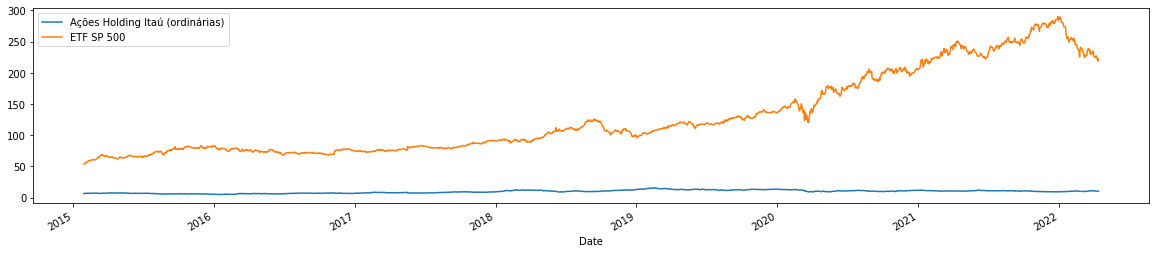

In [ ]:
ITSA3['Close'].plot(figsize=(20,4), label = "Ações Holding Itaú (ordinárias)")
SPXI11['Close'].plot(label = "ETF SP 500")
plt.legend()

In [ ]:
tickers =["ITSA3.SA", "SPXI11.SA"]
comparação1 = web.get_data_yahoo(tickers, start = '2015-01-30')['Close']

[*********************100%***********************]  2 of 2 completed


In [ ]:
comparação1.head()

,ITSA3.SA,SPXI11.SA
Date,,
2015-01-30,6.651798,53.640079
2015-02-02,6.490415,54.784401
2015-02-03,6.609698,55.553650
2015-02-04,6.932465,56.106140
2015-02-05,6.953515,56.385368


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f13b733ddd0>,
      dtype=object)

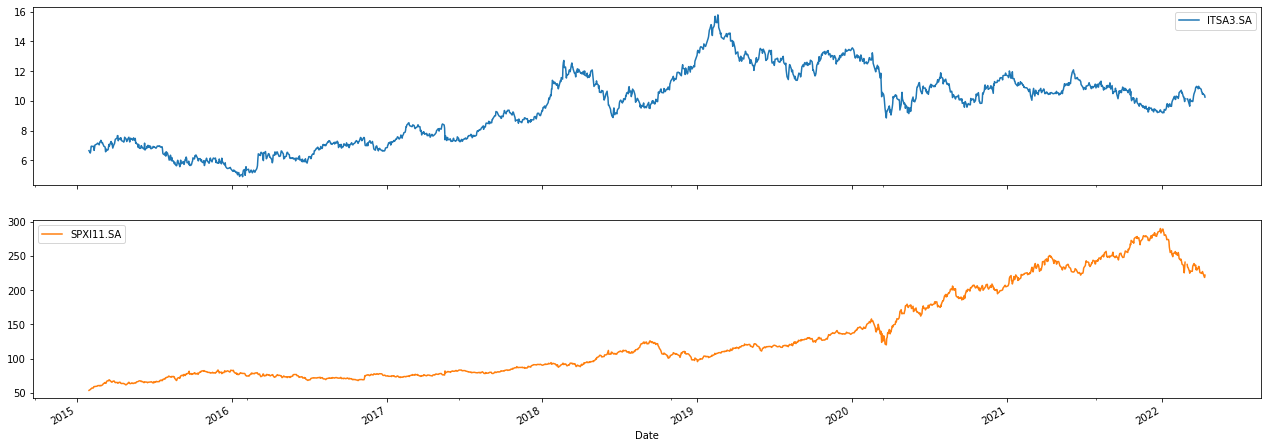

In [ ]:
comparação1.plot(subplots=True, figsize=(22,8))

In [ ]:
comparação1.corr()

,ITSA3.SA,SPXI11.SA
ITSA3.SA,1.000000,0.457722
SPXI11.SA,0.457722,1.000000


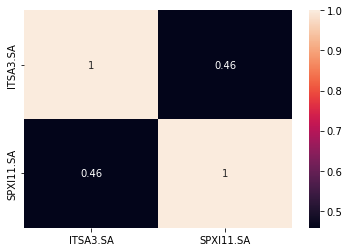

In [ ]:
sns.heatmap(comparação1.corr(), annot=True)

In [ ]:
comparação1pct=comparação1.pct_change()

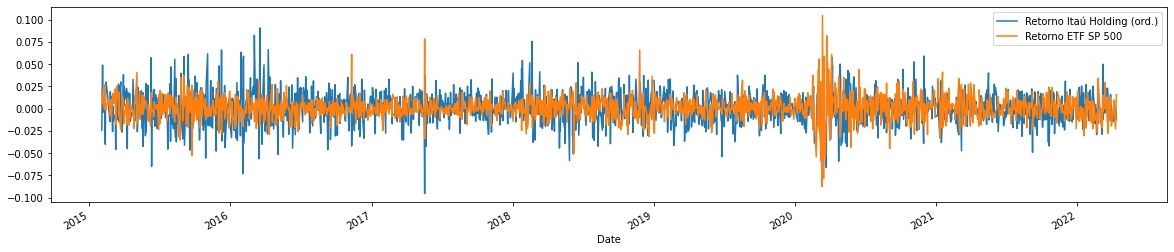

In [ ]:
comparação1pct['ITSA3.SA'].plot(figsize=(20,4), label = "Retorno Itaú Holding (ord.)")
comparação1pct['SPXI11.SA'].plot(label = "Retorno ETF SP 500")
plt.legend()

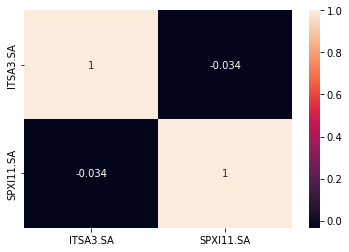

In [ ]:
sns.heatmap(comparação1pct.corr(), annot=True)

##**ITSA4 X IVVB11**

In [ ]:
tickers =["ITSA4.SA", "IVVB11.SA"]
comparação2= web.get_data_yahoo(tickers, start = '2014-04-29')['Close']

[*********************100%***********************]  2 of 2 completed


In [ ]:
comparação2.corr()

,ITSA4.SA,IVVB11.SA
ITSA4.SA,1.000000,0.282462
IVVB11.SA,0.282462,1.000000


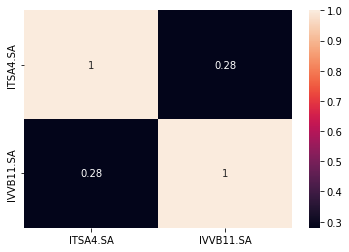

In [ ]:
sns.heatmap(comparação2.corr(), annot=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f13b37abfd0>,
      dtype=object)

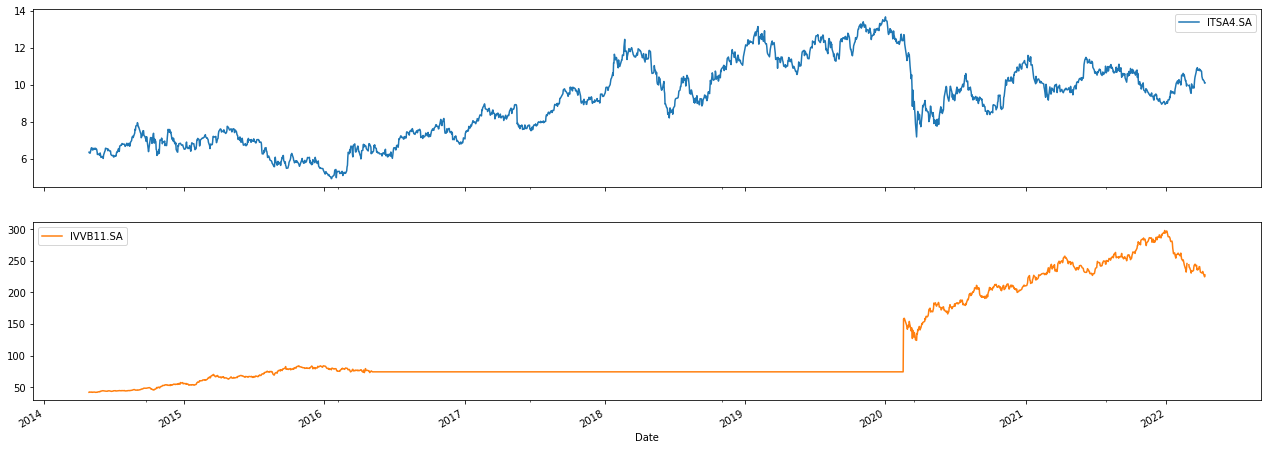

In [ ]:
comparação2.plot(subplots=True, figsize=(22,8))

## **ITSA3 X IVVB11**

In [ ]:
tickers =["ITSA3.SA", "IVVB11.SA"]
comparação3 = web.get_data_yahoo(tickers, start = '2014-04-29')['Close']

[*********************100%***********************]  2 of 2 completed


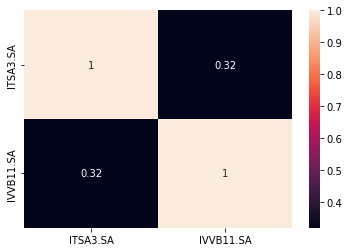

In [ ]:
sns.heatmap(comparação3.corr(), annot=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f13b261cc90>,
      dtype=object)

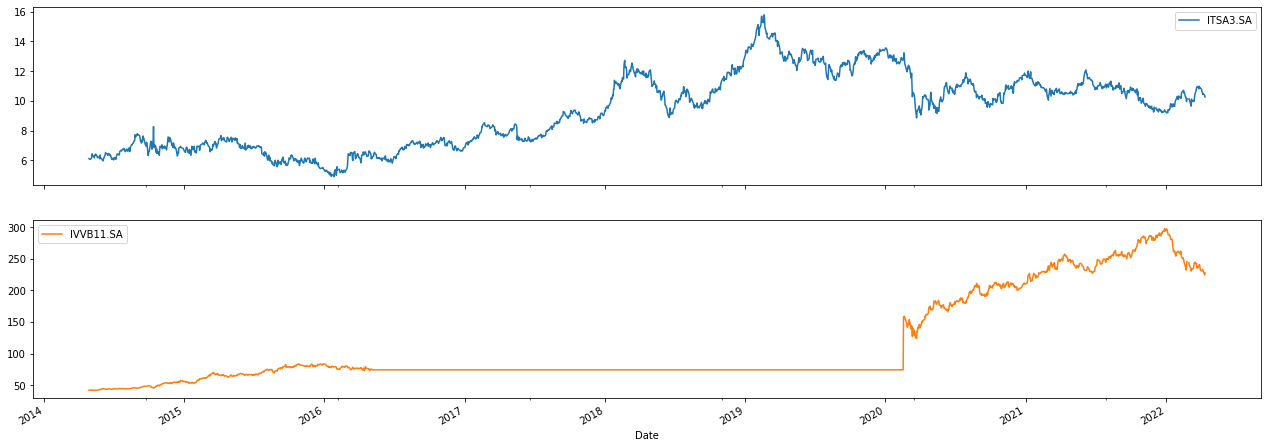

In [ ]:
comparação3.plot(subplots=True, figsize=(22,8))

## **ITSA4 X SPXI11**

In [ ]:
tickers =["ITSA4.SA", "SPXI11.SA"]
comparação4 = web.get_data_yahoo(tickers, start = '2015-01-30')['Close']

[*********************100%***********************]  2 of 2 completed


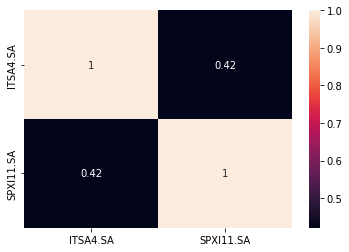

In [ ]:
sns.heatmap(comparação4.corr(), annot=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f13b69d5a10>,
      dtype=object)

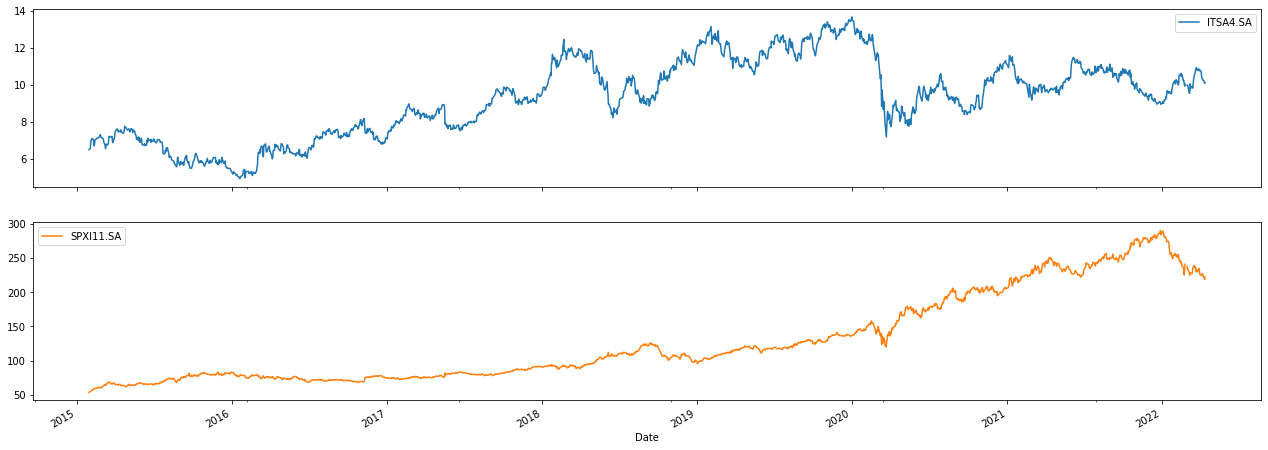

In [ ]:
comparação4.plot(subplots=True, figsize=(22,8))

# **TRATAMENTO PADRÃO**

Ações: ITSA4, PETR4, SPXI11, IVVB11. 

In [ ]:
SPXI11 = web.get_data_yahoo('SPXI11.SA') ### Começa em 2015-01-30

[*********************100%***********************]  1 of 1 completed


In [ ]:
IVVB11 = web.get_data_yahoo('IVVB11.SA')### Começa em 2014-04-29

[*********************100%***********************]  1 of 1 completed


In [ ]:
SPXI11.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-30,53.640079,53.640079,53.640079,53.640079,53.640079,0
2015-02-02,54.784401,54.784401,54.784401,54.784401,54.784401,0
2015-02-03,55.553650,55.553650,55.553650,55.553650,55.553650,0
2015-02-04,56.106140,56.106140,56.106140,56.106140,56.106140,0
2015-02-05,56.385368,56.385368,56.385368,56.385368,56.385368,0


In [ ]:
IVVB11.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-07,231.000000,233.990005,230.919998,233.000000,233.000000,243519
2022-04-08,232.990005,234.500000,230.800003,231.029999,231.029999,169476
2022-04-11,228.559998,229.570007,225.899994,226.100006,226.100006,297983
2022-04-12,225.600006,227.479996,223.410004,224.500000,224.500000,366900
2022-04-13,223.830002,228.050003,223.830002,227.399994,227.399994,427624


In [ ]:
ITSA4 = web.get_data_yahoo('ITSA4.SA') ### Série começa em 2000-01-03.

[*********************100%***********************]  1 of 1 completed


In [ ]:
ITSA4.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.969856,1.089143,0.964670,1.032093,0.540717,10799362.0
2000-01-04,0.995788,0.995788,0.933551,0.933551,0.489090,12675326.0
2000-01-05,0.938738,1.011347,0.902433,1.011347,0.529848,9621184.0
2000-01-06,1.006161,1.032093,1.000974,1.026906,0.537999,24240133.0
2000-01-07,1.037279,1.052838,1.011347,1.021720,0.535282,11776899.0


In [ ]:
PETR4 = web.get_data_yahoo('PETR4.SA') ### Série começa em 2000-01-03.

[*********************100%***********************]  1 of 1 completed


In [ ]:
PETR4.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,3.203312,35389440000
2000-01-04,5.550,5.550,5.550,5.550,3.026108,28861440000
2000-01-05,5.494,5.494,5.494,5.494,2.995573,43033600000
2000-01-06,5.475,5.475,5.475,5.475,2.985214,34055680000
2000-01-07,5.500,5.500,5.500,5.500,2.998845,20912640000


In [ ]:
PETR3 = web.get_data_yahoo('PETR3.SA', '2021-12-27')

[*********************100%***********************]  1 of 1 completed


In [ ]:
PETR3.head() ### Valor da ação em 30/12/21 = R$ 30,70

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-27,30.440001,31.230000,30.240000,31.040001,28.607185,17868100
2021-12-28,31.260000,31.469999,31.000000,31.059999,28.625618,8078000
2021-12-29,31.010000,31.340000,30.750000,30.950001,28.524240,11460950
2021-12-30,30.950001,31.129999,30.549999,30.700001,28.293835,34157000
2022-01-03,30.840000,31.670000,30.760000,31.520000,29.049564,15578500


In [ ]:
PETR3 = web.get_data_yahoo('PETR3.SA', '2015-05-15')

[*********************100%***********************]  1 of 1 completed


In [ ]:
FPETR3 = PETR3['Close']

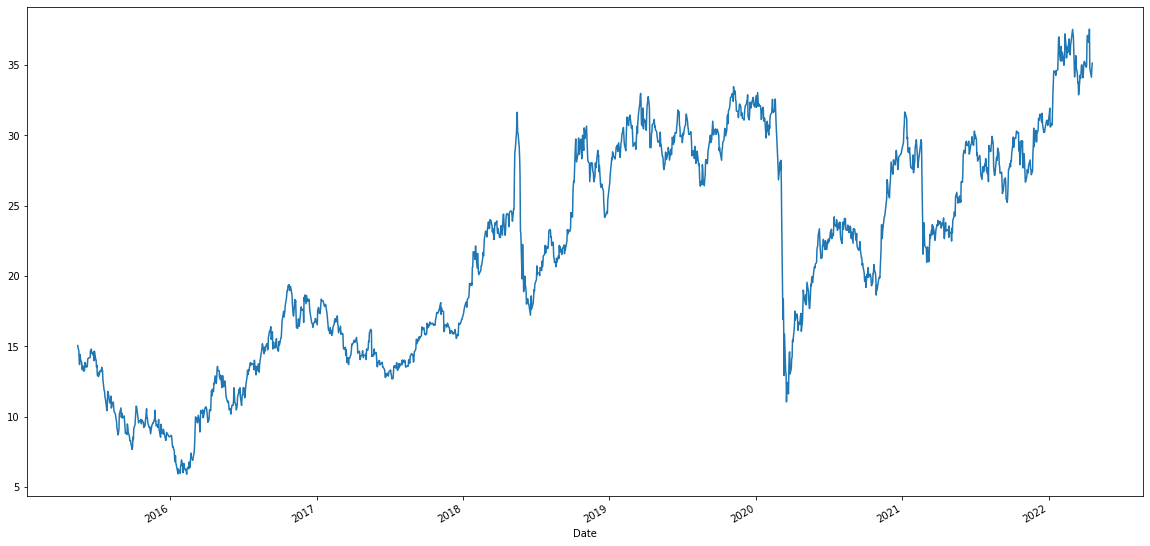

In [ ]:
FPETR3.plot(figsize = (20,10)) ### Gráfico de preço de fechamento das ações PETR3.
plt.show()

## Petrobrás

In [ ]:
PETR4['Resultado'] = (PETR4['Close']/PETR4['Close'].shift(1))-1

In [ ]:
print(PETR4['Resultado'])

Date
2000-01-03         NaN
2000-01-04   -0.055319
2000-01-05   -0.010090
2000-01-06   -0.003458
2000-01-07    0.004566
                ...   
2022-04-07    0.051916
2022-04-08    0.004994
2022-04-11   -0.007600
2022-04-12   -0.002946
2022-04-13    0.021270
Name: Resultado, Length: 5599, dtype: float64


In [ ]:
PETR4.head()

,Open,High,Low,Close,Adj Close,Volume,Resultado
Date,,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,3.203312,35389440000,NaN
2000-01-04,5.550,5.550,5.550,5.550,3.026108,28861440000,-0.055319
2000-01-05,5.494,5.494,5.494,5.494,2.995573,43033600000,-0.010090
2000-01-06,5.475,5.475,5.475,5.475,2.985214,34055680000,-0.003458
2000-01-07,5.500,5.500,5.500,5.500,2.998845,20912640000,0.004566


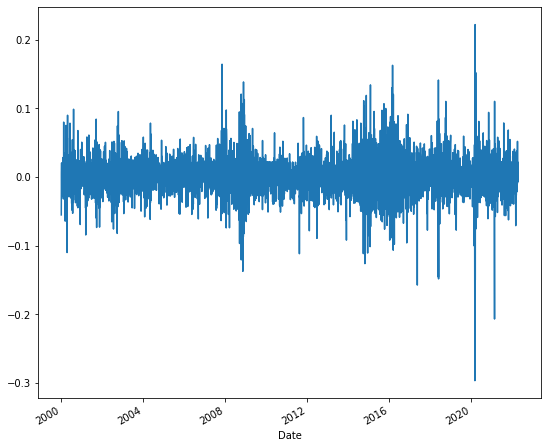

In [ ]:
PETR4['Resultado'].plot(figsize = (9,8))
plt.show()

In [ ]:
média_PETR4 = PETR4['Resultado'].mean()

In [ ]:
média_PETR4

0.0006796819731771092

In [ ]:
média_anual_PETR4 = PETR4['Resultado'].mean()*250
print(média_anual_PETR4)

0.1699204932942773


## **Carteiras**

In [ ]:
carteira = ["ITSA4.SA", "PETR4.SA", "SPXI11.SA", "IVVB11.SA"]

In [ ]:
base = pd.DataFrame()

In [ ]:
for i in carteira:
  base[i] = web.get_data_yahoo(i, start = '2015-01-30')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1782 entries, 2015-01-30 to 2022-04-01
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ITSA4.SA   1781 non-null   float64
 1   PETR4.SA   1781 non-null   float64
 2   SPXI11.SA  1781 non-null   float64
 3   IVVB11.SA  1781 non-null   float64
dtypes: float64(4)
memory usage: 69.6 KB


In [ ]:
base.head()

,ITSA4.SA,PETR4.SA,SPXI11.SA,IVVB11.SA
Date,,,,
2015-01-30,6.482052,8.30,53.640079,53.939079
2015-02-02,6.545879,8.79,54.784401,54.330002
2015-02-03,6.758638,9.97,55.553650,55.720001
2015-02-04,7.006857,10.02,56.106140,57.029999
2015-02-05,7.006857,9.83,56.385368,57.340000


In [ ]:
base.tail()

,ITSA4.SA,PETR4.SA,SPXI11.SA,IVVB11.SA
Date,,,,
2022-03-28,10.77,31.600000,232.399994,238.300003
2022-03-29,10.85,32.299999,234.649994,240.649994
2022-03-30,10.84,32.990002,234.550003,240.559998
2022-03-31,10.75,33.450001,229.919998,235.649994
2022-04-01,10.79,33.009998,225.750000,231.990005


In [ ]:
ret_carteira = (base/base.shift(1))-1

In [ ]:
ret_carteira.head()

,ITSA4.SA,PETR4.SA,SPXI11.SA,IVVB11.SA
Date,,,,
2015-01-30,NaN,NaN,NaN,NaN
2015-02-02,0.009847,0.059036,0.021333,0.007247
2015-02-03,0.032503,0.134243,0.014041,0.025584
2015-02-04,0.036726,0.005015,0.009945,0.023510
2015-02-05,0.000000,-0.018962,0.004977,0.005436


In [ ]:
pesos = np.array([0.25, 0.25, 0.25, 0.25]) ### Pesos na composição da carteira.
pesos2 = np.array([0.2, 0.4, 0.2, 0.2])

In [ ]:
np.dot(ret_carteira, pesos)

array([        nan,  0.02436592,  0.051593  , ...,  0.00491013,
       -0.00862742, -0.01077533])

In [ ]:
media_anual_carteira = ret_carteira.mean()*250 ### Média anual dos retornos das ações da carteira.
print(media_anual_carteira)

ITSA4.SA     0.121515
PETR4.SA     0.323755
SPXI11.SA    0.225550
IVVB11.SA    0.273275
dtype: float64


In [ ]:
np.dot(media_anual_carteira, pesos)

0.23602355325039925

In [ ]:
portfólio = str(round(np.dot(media_anual_carteira, pesos), 3)*100)+'%' ### Carteira com pesos iguais.
print(portfólio)

23.599999999999998%


In [ ]:
portfólio2 = str(round(np.dot(media_anual_carteira, pesos2), 3)*100)+'%' ### Carteira, PETR4 maior peso.
print(portfólio2)

25.4%


## **Índice de ações**

Ações: MGLU3; BBAS3; VIIA3; JBSS; VIVA3


In [ ]:
ind_carteiras = ["MGLU3.SA", "BBAS3.SA", "VIIA3.SA", "MELI34.SA", "VIVA3.SA"]

In [ ]:
indicadores = pd.DataFrame()  ### O objeto indicadores vai ter a forma de um data frame do pandas.

In [ ]:
for h in ind_carteiras:
  indicadores[h] = web.get_data_yahoo(h, start = '2020-01-30')['Close'] ### Estamos criando o data frame do pandas de forma iterativa.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
indicadores.head()

,MGLU3.SA,BBAS3.SA,VIIA3.SA,MELI34.SA,VIVA3.SA
Date,,,,,
2020-01-30,14.1250,49.799999,14.65,23.799999,32.200001
2020-01-31,13.9500,48.540001,14.00,23.700001,31.469999
2020-02-03,14.1325,48.779999,14.49,24.125000,32.669998
2020-02-04,14.4150,48.250000,14.95,25.250000,32.709999
2020-02-05,14.3250,50.400002,15.14,25.308332,31.590000


In [ ]:
indicadores.tail()

,MGLU3.SA,BBAS3.SA,VIIA3.SA,MELI34.SA,VIVA3.SA
Date,,,,,
2022-03-28,6.47,34.959999,3.94,48.740002,27.150000
2022-03-29,7.00,35.110001,4.28,49.980000,28.420000
2022-03-30,6.87,34.900002,4.19,47.790001,27.510000
2022-03-31,6.82,34.700001,4.17,47.459999,27.690001
2022-04-01,7.35,34.680000,4.33,47.700001,28.260000


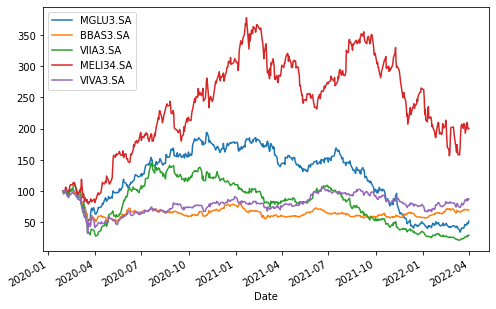

In [ ]:
(indicadores/indicadores.iloc[0] * 100).plot(figsize = (8,5)) ### Grafico que compara o preço de fechamento de uma ação, com o período , ou linha, inicial (iloc[0]).
plt.show()

In [ ]:
u = indicadores.iloc[0,3]

In [ ]:
u

23.799999237060547

In [ ]:
ret_ind = (indicadores/indicadores.shift(1))-1

In [ ]:
ret_ind.tail()

,MGLU3.SA,BBAS3.SA,VIIA3.SA,MELI34.SA,VIVA3.SA
Date,,,,,
2022-03-28,-0.010703,-0.009632,-0.007557,0.061874,-0.023381
2022-03-29,0.081917,0.004291,0.086294,0.025441,0.046777
2022-03-30,-0.018571,-0.005981,-0.021028,-0.043817,-0.032020
2022-03-31,-0.007278,-0.005731,-0.004773,-0.006905,0.006543
2022-04-01,0.077713,-0.000576,0.038369,0.005057,0.020585


In [ ]:
ret_ind_anual = ret_ind.mean()*250
print(ret_ind_anual)

MGLU3.SA    -0.084875
BBAS3.SA    -0.054455
VIIA3.SA    -0.282928
MELI34.SA    0.509722
VIVA3.SA     0.152702
dtype: float64


## **Riscos de ETFs brasileiros**

In [ ]:
cart_risco = ["BOVA11.SA", "SMAL11.SA", "IVVB11.SA", "DIVO11.SA"] ### Carteira formadas por ETF's.

In [ ]:
cetf = pd.DataFrame()

In [ ]:
for g in cart_risco:
  cetf[g] = web.get_data_yahoo(g, start = '2015-01-30')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
cetf.head()

,BOVA11.SA,SMAL11.SA,IVVB11.SA,DIVO11.SA
Date,,,,
2015-01-30,45.610001,46.790001,53.939079,24.840000
2015-02-02,46.270000,47.369999,54.330002,25.350000
2015-02-03,47.639999,47.860001,55.720001,25.830000
2015-02-04,47.770000,47.919998,57.029999,25.870001
2015-02-05,47.880001,48.299999,57.340000,25.969999


In [ ]:
ret_etf = np.log(cetf/cetf.shift(1))
print(ret_etf)

            BOVA11.SA  SMAL11.SA  IVVB11.SA  DIVO11.SA
Date                                                  
2015-01-30        NaN        NaN        NaN        NaN
2015-02-02   0.014367   0.012320   0.007221   0.020323
2015-02-03   0.029179   0.010291   0.025263   0.018758
2015-02-04   0.002725   0.001253   0.023238   0.001547
2015-02-05   0.002300   0.007899   0.005421   0.003858
...               ...        ...        ...        ...
2022-03-28  -0.002094  -0.004278   0.012032  -0.005387
2022-03-29   0.010771   0.016356   0.009813   0.008070
2022-03-30   0.001295  -0.015367  -0.000374  -0.007395
2022-03-31  -0.002592  -0.003796  -0.020622   0.000000
2022-04-01   0.013746   0.023777  -0.015653   0.020041

[1781 rows x 4 columns]


In [ ]:
ret_etf.mean()*250

BOVA11.SA    0.132550
SMAL11.SA    0.136714
IVVB11.SA    0.204893
DIVO11.SA    0.156320
dtype: float64

In [ ]:
ret_etf.std()

BOVA11.SA    0.016693
SMAL11.SA    0.017665
IVVB11.SA    0.020942
DIVO11.SA    0.015945
dtype: float64

Ações: "VALE3.SA", "SUZB3.SA", "ITUB4.SA", "PETR4.SA".


In [ ]:
cart_abril = ["VALE3.SA", "SUZB3.SA", "ITUB4.SA", "PETR4.SA"]

In [ ]:
cabril = pd.DataFrame()

In [ ]:
for t in cart_abril:
  cabril[t] = web.get_data_yahoo(t, start = '2010-01-30')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
cabril.head()

,VALE3.SA,SUZB3.SA,ITUB4.SA,PETR4.SA
Date,,,,
2010-02-01,50.389999,16.007999,16.761150,34.299999
2010-02-02,50.389999,16.007999,16.984266,34.099998
2010-02-03,50.279999,16.007999,16.911413,34.040001
2010-02-04,47.560001,16.007999,16.260273,32.299999
2010-02-05,47.160000,16.007999,15.845912,31.520000


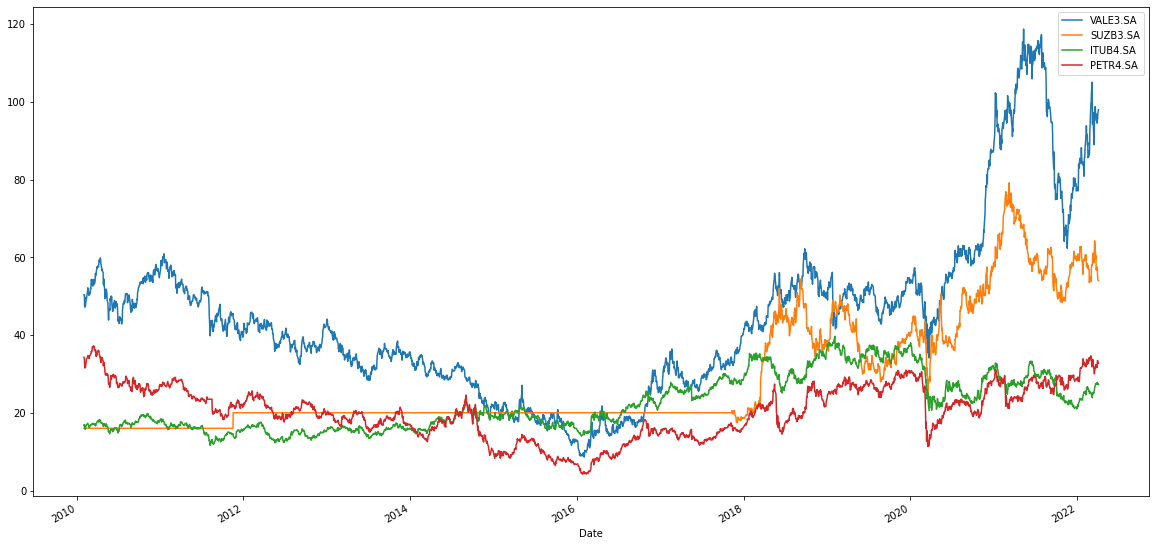

In [ ]:
cabril.plot(figsize = (20,10)) ### Gráfico de preço de fechamento das ações da carteira cabril.
plt.show()

##**Petrobrás x Vale**

In [ ]:
VALE3 = web.DataReader('VALE3.SA', data_source = 'yahoo', start = '2000-1-1') ### Pegando dados de outra forma.

[*********************100%***********************]  1 of 1 completed


In [ ]:
VALE3.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,3.500000,3.542500,3.500000,3.500000,1.796318,585600
2000-01-04,3.466666,3.474166,3.416666,3.416666,1.753548,782400
2000-01-05,3.375000,3.416666,3.375000,3.416666,1.753548,1876800
2000-01-06,3.416666,3.500000,3.416666,3.416666,1.753548,792000
2000-01-07,3.458333,3.559166,3.458333,3.541666,1.817702,5347200


In [ ]:
VALE3.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-29,95.339996,95.660004,93.400002,94.519997,94.519997,38228800
2022-03-30,96.320000,97.110001,95.269997,95.870003,95.870003,22007500
2022-03-31,96.419998,96.889999,95.360001,95.599998,95.599998,17981400
2022-04-01,96.779999,97.500000,96.070000,96.959999,96.959999,22457700
2022-04-04,96.769997,98.250000,96.550003,97.940002,97.940002,16914000


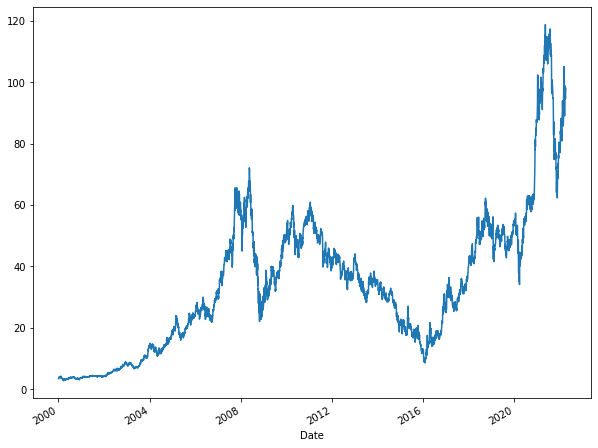

In [ ]:
VALE3['Close'].plot (figsize = (10, 8)) ### Gráfico simples da Vale.
plt.show()

In [ ]:
PETR4 = web.DataReader('PETR4.SA', data_source = 'yahoo', start = '2000-1-1') ### Pegando ações da Petrobrás de outra forma.

[*********************100%***********************]  1 of 1 completed


In [ ]:
PETR4.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-29,32.130001,32.759998,31.920000,32.299999,32.299999,93809000
2022-03-30,32.500000,32.990002,32.380001,32.990002,32.990002,69648400
2022-03-31,32.570000,33.570000,32.500000,33.450001,33.450001,94269500
2022-04-01,33.549999,33.790001,32.910000,33.009998,33.009998,72283700
2022-04-04,32.900002,32.900002,32.250000,32.750000,32.750000,53470900


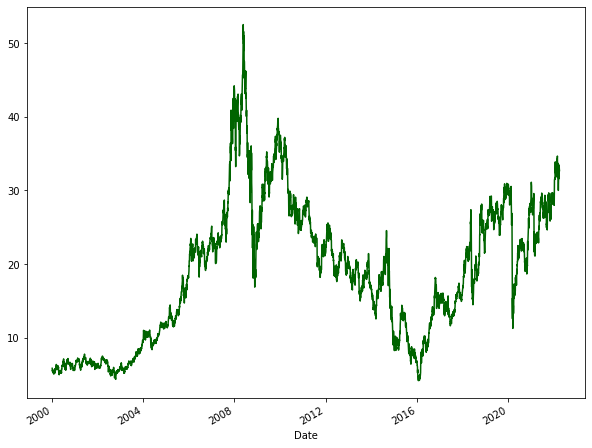

In [ ]:
PETR4['Close'].plot (figsize = (10, 8), color = "darkgreen") ### Gráfico simples da Petrobrás.
plt.show()

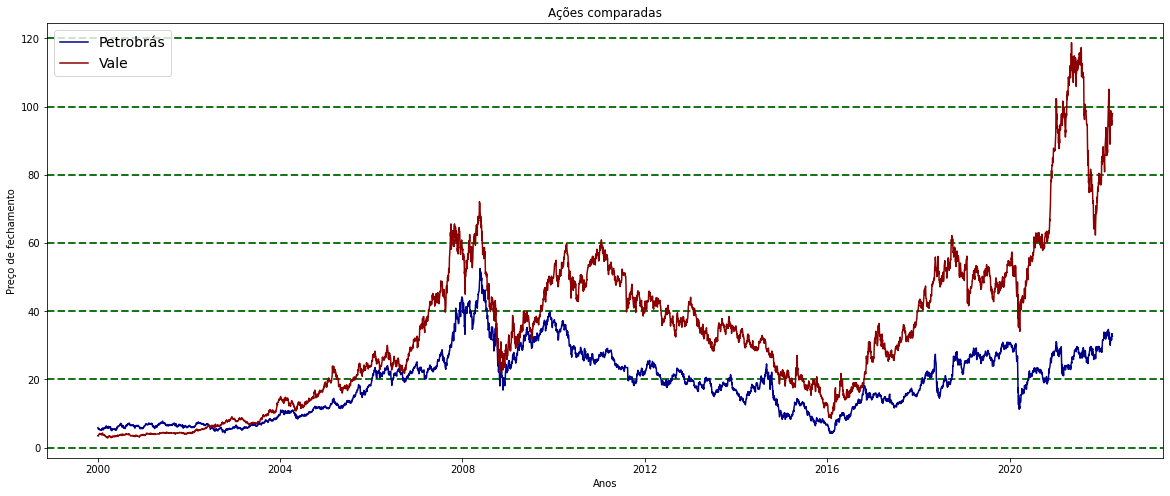

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(PETR4['Close'], linestyle='-',color = 'darkblue')
plt.plot(VALE3['Close'], color = 'darkred', markersize =0.5)
plt.legend(['Petrobrás','Vale'], fontsize=14)
plt.xlabel('Anos', fontsize=10)
plt.ylabel('Preço de fechamento', fontsize=10)
plt.title('Ações comparadas')
axes = plt.gca()
axes.yaxis.grid(b=True, color='darkgreen', alpha=0.9, linestyle='--', linewidth=2)
plt.show()

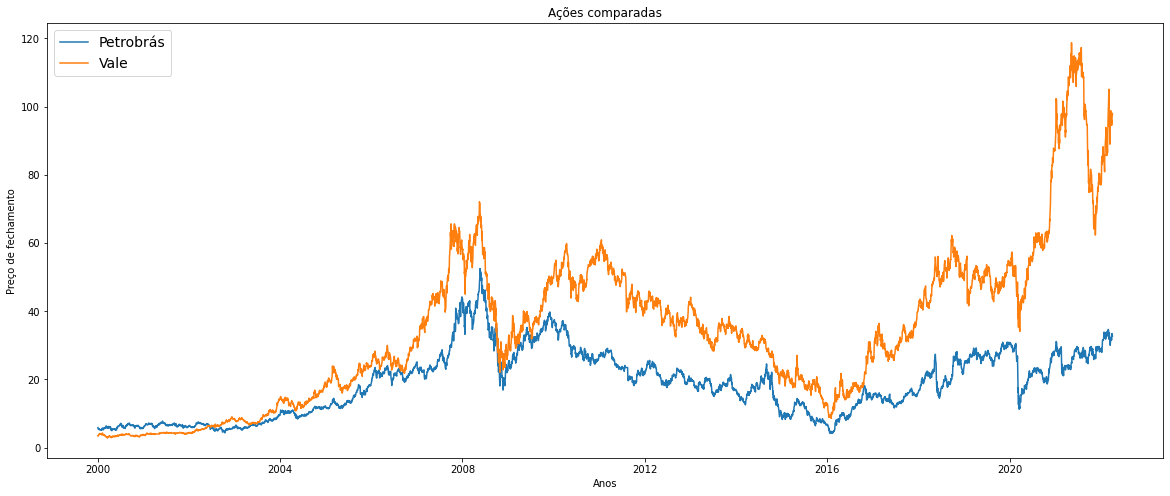

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(PETR4['Close'], linestyle='-')  ### Cores definidas automaticamente.
plt.plot(VALE3['Close'], markersize =0.5)
plt.legend(['Petrobrás','Vale'], fontsize=14)
plt.xlabel('Anos', fontsize=10)
plt.ylabel('Preço de fechamento', fontsize=10)
plt.title('Ações comparadas')
plt.show() ### Sem o plt.gca: ficou sem as linhas de grade.

In [ ]:
retvale = VALE3['Close'].pct_change()

In [ ]:
retpetr = PETR4['Close'].pct_change()

Juntando as duas séries em um mesmo data frame

In [ ]:
tickers_VP = ["VALE3.SA", "PETR4.SA"]

In [ ]:
df_vp = pd.DataFrame()

In [ ]:
for y in tickers_VP:
  df_vp[y] = web.get_data_yahoo(y, start = '2010-01-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df_vp

,VALE3.SA,PETR4.SA
Date,,
2010-01-04,51.490002,37.320000
2010-01-05,51.970001,37.000000
2010-01-06,53.070000,37.500000
2010-01-07,53.290001,37.150002
2010-01-08,53.810001,36.950001
...,...,...
2022-03-29,94.519997,32.299999
2022-03-30,95.870003,32.990002
2022-03-31,95.599998,33.450001


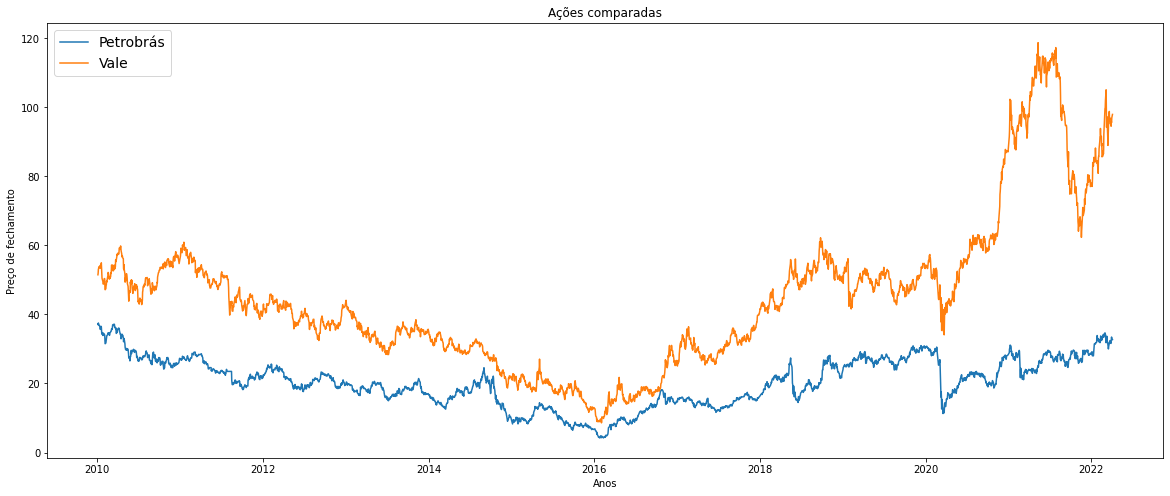

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(df_vp['PETR4.SA'])  ### Cores definidas automaticamente.
plt.plot(df_vp['VALE3.SA'])
plt.legend(['Petrobrás','Vale'], fontsize=14)
plt.xlabel('Anos', fontsize=10)
plt.ylabel('Preço de fechamento', fontsize=10)
plt.title('Ações comparadas')
plt.show() ### Sem o plt.gca: ficou sem as linhas de grade.

In [ ]:
df_vp.corr()

,VALE3.SA,PETR4.SA
VALE3.SA,1.000000,0.737817
PETR4.SA,0.737817,1.000000


In [ ]:
df_vp2 = web.DataReader('VALE3.SA', 'PETR4.SA', data_source = 'yahoo', start = '2000-1-1').['Close'] ### Erro.

SyntaxError: ignored

# **REDES NEURAIS - ETF's**

## **IVVB11** 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler ### https://github.com/fernandofeltrin/; Rede Neural Artificial Intuitiva – Bot Trader

In [ ]:
base = pd.read_csv ('/content/drive/MyDrive/Python/IVVB11.SA.csv')

In [ ]:
base

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-04-30,42.430000,42.430000,42.430000,42.430000,42.430000,0
1,2014-05-02,42.099998,42.099998,42.099998,42.099998,42.099998,0
2,2014-05-05,42.299999,42.299999,42.299999,42.299999,42.299999,0
3,2014-05-06,42.000000,42.000000,42.000000,42.000000,42.000000,0
4,2014-05-07,42.160000,42.160000,42.160000,42.160000,42.160000,0
...,...,...,...,...,...,...,...
1969,2022-04-04,230.779999,230.979996,228.399994,230.880005,230.880005,296356
1970,2022-04-05,230.600006,232.779999,229.580002,230.500000,230.500000,347925
1971,2022-04-06,229.899994,232.190002,228.729996,231.500000,231.500000,892978
1972,2022-04-07,231.000000,233.990005,230.919998,233.000000,233.000000,243519


In [ ]:
base = base.dropna()

In [ ]:
base_treino = base.iloc[:, 1:2].values

In [ ]:
base_treino

array([[ 42.43    ],
       [ 42.099998],
       [ 42.299999],
       ...,
       [229.899994],
       [231.      ],
       [  0.      ]])

In [ ]:
type(base)

pandas.core.frame.DataFrame

In [ ]:
len(base)

1974

In [ ]:
normalizador = MinMaxScaler (feature_range = (0,1))
base_treino_normalizada = normalizador.fit_transform(base_treino) ### Normalizando o vetor de treino.

In [ ]:
base_treino_normalizada

array([[0.142373  ],
       [0.14126569],
       [0.14193678],
       ...,
       [0.77142474],
       [0.77511579],
       [0.        ]])

In [ ]:
type(base_treino_normalizada)

numpy.ndarray

In [ ]:
print(base_treino_normalizada[90]) ### Identificando o número na posição 90.

[0.15428495]


In [ ]:
print(base_treino_normalizada[89])

[0.15300986]


In [ ]:
print(base_treino_normalizada[91])

[0.15509027]


In [ ]:
print(base_treino_normalizada[1973])

[0.]


In [ ]:
len(base_treino_normalizada)

1974

In [ ]:
previsores = [] ### Criando duas listas que receberão atributos.
preço_real = []

for i in range(90, 1974): ### Escolhemos trabalhar com a informação 90 em diante.
  previsores.append(base_treino_normalizada[i-90: i,0]) ### Foram criadas 1884 colunas, cada uma com 90 observações. A função append adiciona à lista.
  preço_real.append(base_treino_normalizada[i,0]) ### o vetor de preço real começa da posição 91 do vetor base_treino_normalizada.

In [ ]:
len(previsores) ### Número de colunas do vetor previsores.

1884

# Aprendendo listas

In [ ]:
lt = [25, 54, 11, 66, 64, 28, 87, 96, 47,68, 55, 54, 98, 77, 74, 72, 98, 42, 36, 35, 35, 67, 95] ### Criei minha lista.

In [ ]:
lt

[25,
 54,
 11,
 66,
 64,
 28,
 87,
 96,
 47,
 68,
 55,
 54,
 98,
 77,
 74,
 72,
 98,
 42,
 36,
 35,
 35,
 67,
 95]

In [ ]:
print(lt[7])

96


In [ ]:
type(lt)

list

In [ ]:
print(lt[0]) ### Primeira posição na lista.

25


In [ ]:
print(lt[-2]) ### Penúltima posição na lista.

67


In [ ]:
lt1 = lt[0:12] ### Slice ou pedaço da lista.

In [ ]:
lt1 

[25, 54, 11, 66, 64, 28, 87, 96, 47, 68, 55, 54]

In [ ]:
lt2 = [] ### Criando uma lista em branco para preenchela em seguida.

In [ ]:
for i in range (1, 15):
  lt2.append(lt[i])

In [ ]:
lt2  ### Atenção posição "0" é o primeiro número de lt; posição "14" é o 15º número da mesma lista.

[54, 11, 66, 64, 28, 87, 96, 47, 68, 55, 54, 98, 77, 74]

In [ ]:
lt3 =[]

In [ ]:
for i in range (1, 15):
  lt3.append (lt[i+2])

In [ ]:
lt3

[66, 64, 28, 87, 96, 47, 68, 55, 54, 98, 77, 74, 72, 98]

In [ ]:
lt4=[]

In [ ]:
for i in range (1, 15):
  lt4.append (lt[i-3])

In [ ]:
lt4

[67, 95, 25, 54, 11, 66, 64, 28, 87, 96, 47, 68, 55, 54]

In [ ]:
type(lt4)

list

# Votando ao trabalho

In [ ]:
len(preço_real) ### Número de colunas do vetor preço_real.

1884

In [ ]:
print(previsores[1])

[0.14126569 0.14193678 0.14093014 0.14146702 0.14025904 0.14103081
 0.14210456 0.14190324 0.14129925 0.14042682 0.14025904 0.14096369
 0.14093014 0.14116503 0.14233944 0.14264143 0.14287633 0.14438628
 0.14505738 0.14421851 0.14703712 0.14827864 0.1476411  0.14938595
 0.14844643 0.1483122  0.14747333 0.14717134 0.14703712 0.14603047
 0.14646669 0.14807732 0.14804376 0.14878197 0.14750688 0.14797664
 0.14606402 0.14643313 0.14579559 0.14683578 0.14707068 0.14814443
 0.14958729 0.14879854 0.14868131 0.14733911 0.14774176 0.14811087
 0.14851352 0.1514328  0.14931884 0.14982217 0.14952018 0.14868131
 0.14874842 0.14965438 0.1494195  0.14938595 0.14938595 0.14955373
 0.1497215  0.14931884 0.1479431  0.1483122  0.14918462 0.14858063
 0.14878197 0.14948661 0.14978861 0.14915107 0.14978861 0.15035905
 0.14975506 0.15119792 0.15166768 0.15196968 0.1525401  0.15415073
 0.15495605 0.15451983 0.15374808 0.15257366 0.15213745 0.15267432
 0.15331186 0.15978794 0.15264077 0.15217099 0.15300986 0.1542

In [ ]:
print(previsores[1883])

[0.94718478 0.94792299 0.94728545 0.93614523 0.94329241 0.94574195
 0.95768745 0.96520369 0.95161404 0.95369442 0.96805587 0.96402926
 0.96550567 0.97980005 0.96819012 0.95124488 0.96319039 0.97124362
 0.9738273  0.98443063 0.99312131 0.98768545 0.98986649 0.98147779
 1.         0.99406084 0.97980005 0.97980005 0.96208312 0.96684795
 0.96268708 0.95879471 0.94074222 0.9420509  0.93450107 0.9247702
 0.90628148 0.8892021  0.87510905 0.87779349 0.87722301 0.85933835
 0.84860078 0.86923696 0.87078055 0.88306162 0.88071274 0.86903563
 0.87309584 0.86490846 0.87581377 0.87846452 0.8556473  0.84390312
 0.85037918 0.84356756 0.83769547 0.82843436 0.81303272 0.80736196
 0.7965573  0.76548558 0.80303341 0.82410582 0.81585131 0.80222807
 0.79538287 0.78484666 0.78182675 0.78159184 0.78796729 0.78014901
 0.7855178  0.81175762 0.80994569 0.81380447 0.81769684 0.80659021
 0.80699285 0.79162475 0.79357093 0.79310117 0.80363737 0.80162406
 0.80360383 0.7860211  0.77437758 0.77377362 0.77142474 0.77511

In [ ]:
print(preço_real[1]) ### Posição 91 na base_treino_normalizada.

0.15509027147840074


In [ ]:
print(preço_real[1883]) ### Posição 1973 na base_treino_normalizada.

0.0


In [ ]:
previsores, preço_real = np.array(previsores), np.array(preço_real) ### Transformando em numpy
previsores = np.reshape(previsores,(previsores.shape[0], previsores.shape[1],1))


In [ ]:
from keras.layers import LSTM ### Estrutura da rede neural importada.

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 100,
                   return_sequences = True,
                   input_shape = (previsores.shape[1],1)))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 50,
                   return_sequences = True,))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))
regressor.add(Dense(units = 1,
                    activation = 'linear'))

In [ ]:
regressor.compile(optimizer = 'rmsprop',
                  loss = 'mean_squared_error',
                  metrics = ['mean_absolute_error'])
regressor.fit(previsores,
              preço_real,
              epochs = 100,
              batch_size = 32)

Epoch 1/100
59/59 [==============================] - 16s 162ms/step - loss: 0.0155 - mean_absolute_error: 0.0818
Epoch 2/100
59/59 [==============================] - 10s 162ms/step - loss: 0.0074 - mean_absolute_error: 0.0574
Epoch 3/100
59/59 [==============================] - 9s 158ms/step - loss: 0.0063 - mean_absolute_error: 0.0521
Epoch 4/100
59/59 [==============================] - 9s 159ms/step - loss: 0.0062 - mean_absolute_error: 0.0517
Epoch 5/100
59/59 [==============================] - 9s 160ms/step - loss: 0.0054 - mean_absolute_error: 0.0473
Epoch 6/100
59/59 [==============================] - 10s 162ms/step - loss: 0.0043 - mean_absolute_error: 0.0424
Epoch 7/100
59/59 [==============================] - 9s 159ms/step - loss: 0.0041 - mean_absolute_error: 0.0420
Epoch 8/100
59/59 [==============================] - 9s 160ms/step - loss: 0.0039 - mean_absolute_error: 0.0397
Epoch 9/100
59/59 [==============================] - 9s 160ms/step - loss: 0.0036 - mean_absolute_err

In [ ]:
base_teste = pd.read_csv('/content/drive/MyDrive/Python/IVVB11.SA.csv')
preço_real_teste = base_teste.iloc[:, 1:2].values
base_completa = pd.concat((base['Open'], base_teste['Open']), axis = 0)

In [ ]:
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = entradas.reshape(-1,1)
entradas = normalizador.transform(entradas)

In [ ]:
previsores_teste = []
for j in range(90,112):
    previsores_teste.append(entradas[j-90:j, 0])
previsores_teste = np.array(previsores_teste)
previsores_teste = np.reshape(previsores_teste,
                              (previsores_teste.shape[0],
                               previsores_teste.shape[1],
                               1))
previsores_teste = regressor.predict(previsores_teste)
previsores_teste = normalizador.inverse_transform(previsores_teste)

In [ ]:
previsores_teste.mean()

59.26517

In [ ]:
preço_real_teste.mean()

111.54407392705167

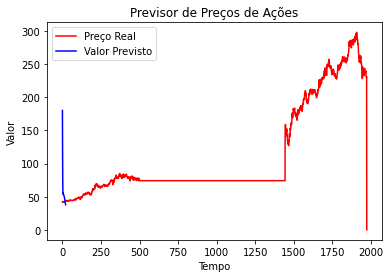

In [ ]:
plt.plot(preço_real_teste,
         color = 'red',
         label = 'Preço Real')
plt.plot(previsores_teste,
         color = 'blue',
         label = 'Valor Previsto')
plt.title('Previsor de Preços de Ações')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()